In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from dateutil.rrule import weekday
from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy.ma.core import divide

In [2]:
con = sqlite3.connect('../data/checking-logs.sqlite')

* Analyze only the users and not the admins
* You can choose the color palette that you like for both of the graphs that you will need to draw in this exercise
* Use the table checker for your query
* Use absolute values of the commits, not the averages
* Sort the dataframes by the total number of commits made by a user

In [13]:
query_weekday = """
SELECT uid,
    CASE CAST(strftime('%w', timestamp) AS INT)
        WHEN 0 THEN 'Sun'
        WHEN 1 THEN 'Mon'
        WHEN 2 THEN 'Tue'
        WHEN 3 THEN 'Wed'
        WHEN 4 THEN 'Thu'
        WHEN 5 THEN 'Fri'
        WHEN 6 THEN 'Sat'
        ELSE '--'
    END AS weekday,
    COUNT(*) AS commits       
FROM checker
WHERE 
    uid NOT LIKE 'admin_%'
GROUP BY uid, weekday    
"""

In [14]:
weekday_df = pd.read_sql(query_weekday, con)
weekday_df

,uid,weekday,commits
0,user_0,Mon,3
1,user_1,Sat,1
2,user_1,Sun,43
3,user_1,Thu,39
4,user_1,Wed,1
...,...,...,...
133,user_7,Tue,5
134,user_7,Wed,3
135,user_8,Sat,46
136,user_8,Sun,26


In [17]:
query_hours = """
SELECT
    uid,
    CAST(strftime('%H', timestamp) AS INT) AS hours,
    COUNT(*) AS commits
FROM checker
WHERE 
    uid NOT LIKE 'admin_%'
GROUP BY uid, hours
"""

In [20]:
hours_df = pd.read_sql(query_hours, con)
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   uid      308 non-null    object
 1   hours    308 non-null    int64 
 2   commits  308 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.3+ KB


In [54]:
weekday_pivot = weekday_df.pivot_table(
    index='weekday',
    columns='uid',
    values='commits',
    fill_value=0
)

weekday_pivot = weekday_pivot.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
weekday_pivot = weekday_pivot[weekday_pivot.sum().sort_values(ascending=False).index]
weekday_pivot

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_11,user_7,user_22,user_23,user_0
weekday,,,,,,,,,,,,,,,,,,,,,
Mon,35.0,50.0,24.0,14.0,7.0,0.0,23.0,5.0,0.0,46.0,...,8.0,10.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0
Tue,86.0,87.0,131.0,44.0,9.0,1.0,0.0,0.0,16.0,11.0,...,4.0,5.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0
Wed,33.0,0.0,32.0,15.0,0.0,34.0,8.0,0.0,37.0,0.0,...,1.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0
Thu,108.0,17.0,4.0,40.0,78.0,51.0,96.0,7.0,77.0,7.0,...,17.0,14.0,15.0,5.0,2.0,0.0,0.0,2.0,6.0,0.0
Fri,61.0,0.0,0.0,10.0,10.0,2.0,7.0,35.0,1.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sat,0.0,79.0,31.0,66.0,21.0,16.0,3.0,90.0,4.0,3.0,...,32.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
Sun,45.0,26.0,13.0,44.0,51.0,69.0,28.0,7.0,2.0,8.0,...,0.0,31.0,27.0,20.0,9.0,8.0,0.0,1.0,0.0,0.0


In [25]:
hours_pivot = hours_df.pivot_table(
    index='hours',
    columns='uid',
    values='commits',
    fill_value=0
)
hours_pivot

uid,user_0,user_1,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17,...,user_27,user_28,user_29,user_3,user_30,user_31,user_4,user_6,user_7,user_8
hours,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,3.0,0.0,0.0,20.0,3.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,0.0,10.0,11.0,6.0,0.0,0.0,2.0,...,0.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,1.0,6.0
9,0.0,0.0,0.0,0.0,10.0,10.0,4.0,2.0,0.0,0.0,...,0.0,0.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,10.0,8.0,2.0,0.0,0.0,7.0,...,0.0,2.0,0.0,2.0,0.0,0.0,26.0,0.0,0.0,5.0


In [82]:
con.close()

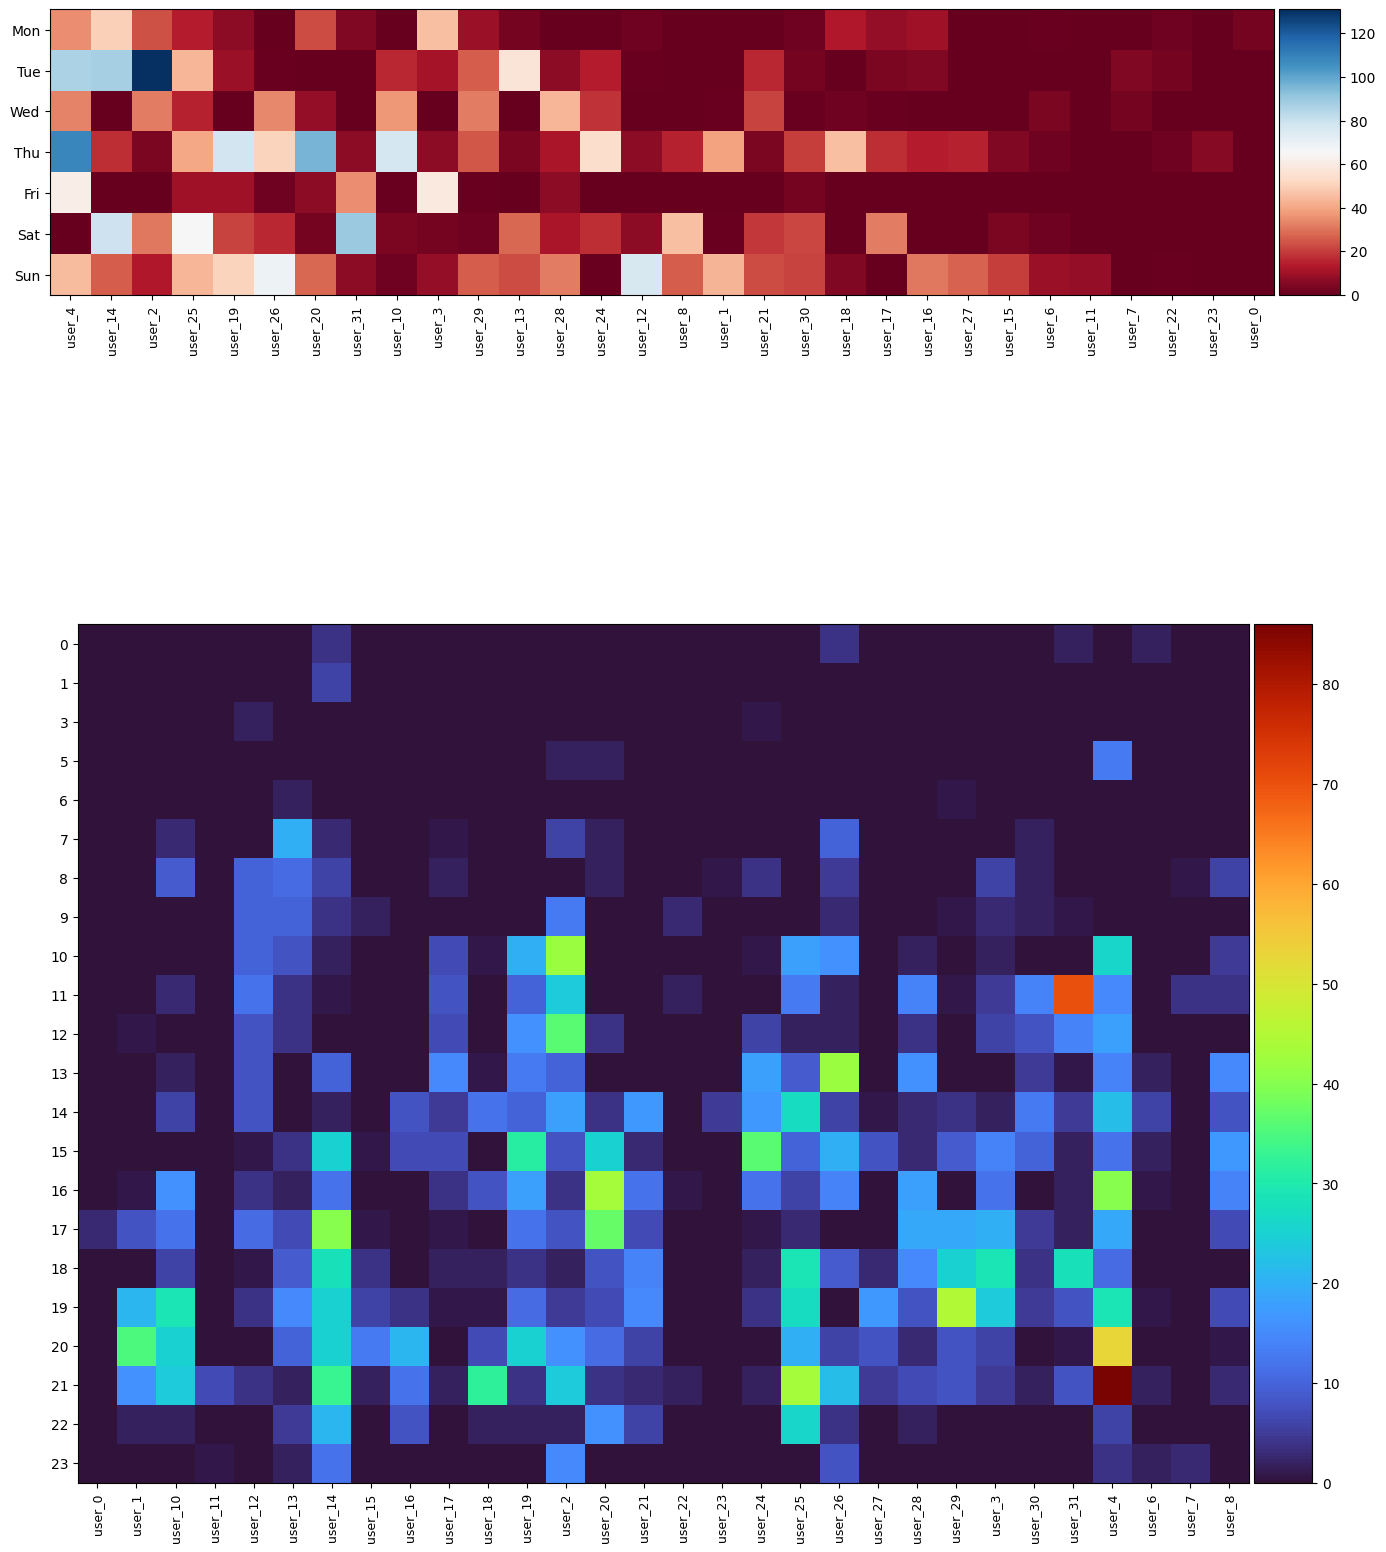

In [108]:
fig, ax = plt.subplots(2, 1)

fig.set_figwidth(15)
fig.set_figheight(20)
fig.subplots_adjust(
    hspace=0.05,
    top=0.95,
    bottom=0.07,
    left=0.07,
    right=0.93
)
fig.patch.set_facecolor('white')

weekday_im = ax[0].imshow(weekday_pivot.values, cmap='RdBu')
hours_im = ax[1].imshow(hours_pivot.values, cmap='turbo')

ax[0].set_xticks(range(len(weekday_pivot.columns)))
ax[0].set_yticks(range(len(weekday_pivot.index)))
ax[0].set_xticklabels(weekday_pivot.columns, rotation=90, fontsize=9)
ax[0].set_yticklabels(weekday_pivot.index)

divider_1 = make_axes_locatable(ax[0])
cax1 = divider_1.append_axes('right', size='5%', pad=0.05)
fig.colorbar(weekday_im, cax=cax1)

ax[1].set_xticks(range(len(hours_pivot.columns)))
ax[1].set_yticks(range(len(hours_pivot.index)))
ax[1].set_xticklabels(hours_pivot.columns, rotation=90, fontsize=9)
ax[1].set_yticklabels(hours_pivot.index)

divider_2 = make_axes_locatable(ax[1])
cax2 = divider_2.append_axes('right', size='5%', pad=0.05)
fig.colorbar(hours_im, cax=cax2)

plt.show()

at the end of your Jupyter Notebook create a markdown cell and insert the questions (answer them looking only at the graphs):
* “Which user has the most commits on Tue?” The answer: user_*.
* Answer: user_2
* “Which user has the most commits on Thu?” The answer: user_*.
* Answer: user_4
* “On which weekday do the users not like making a lot of commits?” The answer, for example: Mon.
* Answer: Fri.
* “Which user at which hour made the largest number of commits?” The answer, for example: user_1, 15
* Answer: user_4, 21